# Predicting Bank Customer Churn using Machine Learning

## Introduction

Churn is defined as a measure of how many customers stop using a product or leave a service.

In this study, I aim to analyze the dataset "bank_customer_churn_dataset.csv" to:

- explore and visualize the factors which lead to bank customer churn
- train a machine learning model to predict if a customer churns or not
- provide actionable insights to the bank to reduce customer churn

## Importing packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import itertools

import warnings
warnings.filterwarnings('ignore')

RSEED = 42

## Loading the dataset

In [3]:
df = pd.read_csv('bank_customer_churn_dataset.csv')

## Data exploration

Examining the first 5 rows of the dataset:

In [4]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Examining the shape of the dataset shows that the dataset consists of 10000 rows and 12 columns:

In [5]:
df.shape

(10000, 12)

Examining the names of the columns and the datatype:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


Examining the summary statistics of the dataset:

In [7]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


There are no null or missing values in the dataset, as shown below.

In [8]:
df.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

Now I examine the number of unique values for each column in the dataset. Columns with a small number of unique values with labelled data can be converted to the categorical datatype.

In [9]:
df.nunique()

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64

'customer_id' should be a unique identifier for each row therefore there are 10000 unique values, as expected.

'churn' is defined as the target variable, since we want to predict if a customer is churned or not.

Based on the summary statistics and the number of unique values of each column, the numerical variables are:
- credit_score
- age
- balance
- estimated_salary
- tenure
- products_number

and the categorical variables are:
- country
- gender
- credit_card
- active_member
- churn


## Data visualization

In [76]:
# Group churn by country
group_country = (df
        .groupby('country')['churn']
        .value_counts(normalize=True)
        .mul(100)
        .rename('percent')
        .reset_index())

# Group churn by gender
group_gender = (df
        .groupby('gender')['churn']
        .value_counts(normalize=True)
        .mul(100)
        .rename('percent')
        .reset_index())    

# Group churn by credit_card
group_credit_card = (df
        .groupby('credit_card')['churn']
        .value_counts(normalize=True)
        .mul(100)
        .rename('percent')
        .reset_index())     

# Group churn by active_member
group_active_member = (df
        .groupby('active_member')['churn']
        .value_counts(normalize=True)
        .mul(100)
        .rename('percent')
        .reset_index())    

# Group churn by products_number
group_products_number = (df
        .groupby('products_number')['churn']
        .value_counts(normalize=True)
        .mul(100)
        .rename('percent')
        .reset_index())                        

# Group churn by tenure
group_tenure = (df
        .groupby('tenure')['churn']
        .value_counts(normalize=True)
        .mul(100)
        .rename('percent')
        .reset_index())     


def plot_subplots(ax, xlabel):
        fontsize=14
        legend_labels, _= ax.get_legend_handles_labels()
        ax.legend(legend_labels, ['Retained','Churned'], fontsize=fontsize)
        plt.xticks(fontsize=fontsize-1)
        plt.yticks(fontsize=fontsize-1)
        plt.xlabel(xlabel, fontsize=fontsize)
        plt.ylabel('Percent of customers [%]', fontsize=fontsize)
        # ax = fig.add_subplot(211)
        # ax2 = fig.add_subplot(212, sharex=ax)
        # ax.set_title(title1)
        # ax2.set_title(title2)
        # ax.set_ylim(1e-3, None)
        # ax2.set_ylim(1e-3, None)
        # ax.plot(x1, y1, **kwargs)
        # ax2.plot(x2, y2, **kwargs)


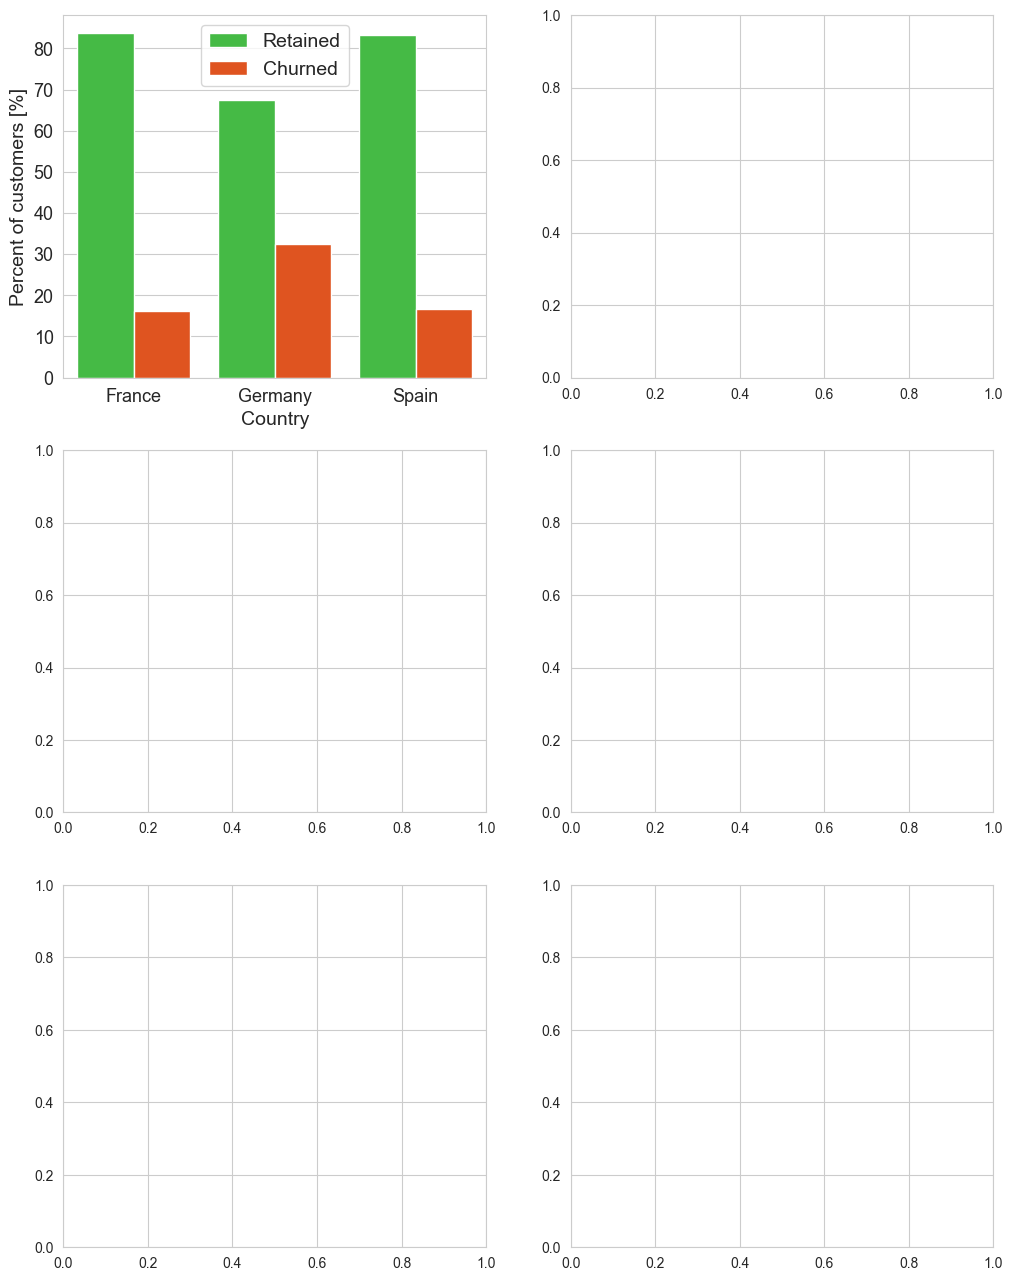

In [78]:
fontsize=14
sns.set_style("whitegrid")
fig, ax = plt.subplots(3, 2, figsize=(12,16))
plt.subplot(3, 2, 1)
ax=sns.barplot(x='country', y='percent', hue='churn', data=group_country, ci=None, palette=["limegreen", "orangered"])
plot_subplots(ax, 'Country')
# legend_labels, _= ax.get_legend_handles_labels()
# ax.legend(legend_labels, ['Retained','Churned'], fontsize=fontsize)
# plt.xticks(fontsize=fontsize-1)
# plt.yticks(fontsize=fontsize-1)
# plt.xlabel('Country', fontsize=fontsize)
# plt.ylabel('Percent of customers [%]', fontsize=fontsize)

# plt.subplot(3, 2, 2)
# sns.barplot(x='gender', y='percent', hue = 'churn', data = group_gender, palette=["limegreen", "orangered"])
# plt.legend([],[], frameon=False)
# plt.xticks(fontsize=fontsize-1)
# plt.yticks(fontsize=fontsize-1)
# plt.xlabel('Gender', fontsize=fontsize)
# plt.ylabel('Percent of customers [%]', fontsize=fontsize)

# plt.subplot(3, 2, 3)
# df_plot = df.groupby('credit_card')['churn'].value_counts(normalize=True).mul(100).rename('Percent').reset_index()
# sns.barplot(x='credit_card', y='percent', hue = 'churn', data = group_credit_card, palette=["#00b4af", "#0f1c3f"])
# plt.legend([],[], frameon=False)
# plt.xticks(fontsize=fontsize-1)
# plt.yticks(fontsize=fontsize-1)
# plt.xticks([0, 1], ["No","Yes"])
# plt.xlabel('Credit card?', fontsize=fontsize)
# plt.ylabel('Percent of customers [%]', fontsize=fontsize)

# plt.subplot(3, 2, 4)
# #df_plot = df.groupby('active_member')['churn'].value_counts(normalize=True).mul(100).rename('Percent').reset_index()
# sns.barplot(x='active_member', y='percent', hue = 'churn', data = group_active_member, palette=["#00b4af", "#0f1c3f"])
# plt.legend([],[], frameon=False)
# plt.xticks([0, 1], ["No","Yes"], fontsize=fontsize)
# plt.yticks(fontsize=fontsize-1)
# plt.xlabel('Active member?', fontsize=fontsize)
# plt.ylabel('Percent of customers [%]', fontsize=fontsize)

# plt.subplot(3, 2, 5)
# df_plot = df.groupby('products_number')['churn'].value_counts(normalize=True).mul(100).rename('Percent').reset_index()
# sns.barplot(x='products_number', y='percent', hue = 'churn', data = group_products_number, palette=["#00b4af", "#0f1c3f"])
# plt.legend([],[], frameon=False)
# plt.xticks(fontsize=fontsize-1)
# plt.yticks(fontsize=fontsize-1)
# plt.xlabel('Number of products', fontsize=fontsize)
# plt.ylabel('Percent of customers [%]', fontsize=fontsize)

# plt.subplot(3, 2, 6)
# df_plot = df.groupby('tenure')['churn'].value_counts(normalize=True).mul(100).rename('Percent').reset_index()
# sns.barplot(x='tenure', y='percent', hue = 'churn', data = group_tenure, palette=["#00b4af", "#0f1c3f"])
# plt.legend([],[], frameon=False)
# plt.xticks(fontsize=fontsize-1)
# plt.yticks(fontsize=fontsize-1)
# plt.xlabel('Tenure in years', fontsize=fontsize)
# plt.ylabel('Percent of customers [%]', fontsize=fontsize)

# plt.subplots_adjust(hspace=0.25, wspace=0.25)
# plt.show()

## Modelling bank customer churn

We want to predict whether a customer churns or not, which is a binary outcome. Therefore this is a classification problem in machine learning.

A important point to take into consideration here is that we are dealing with an imbalanced dataset. If we use a baseline model where all customers are assumed to not have churned, this will still result in a model with 79.6% accuracy.

In [24]:
# Convert some columns to integer or categorical
df = df.assign(
    tenure=lambda x: x['tenure'].astype('int'),
    products_number=lambda x: x['products_number'].astype('int'),
    country=lambda x: x['country'].astype('category'),
    gender=lambda x: x['gender'].astype('category'),
    credit_card=lambda x: x['credit_card'].astype('category'),
    active_member=lambda x: x['active_member'].astype('category')
    )

In [19]:
# Defining target and feature variables
y = df['churn']
X = df.drop(['customer_id','churn'], axis=1)